<a href="https://colab.research.google.com/github/LaurentLABORDE/Loopy_clouds/blob/master/Mask_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

import cv2
import imutils

Pour accéder à des fichiers partagés il faut :
1. Monter le drive 'MyDrive'
2. Ajouter dans 'MyDrive' un raccourci vers le dossier partagé
  Clic-droit sur projet DS : 'Add shortcut to Drive'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/PROJET DS/Dataset'

path_train = os.path.join('r', path, 'train.csv')

df_train = pd.read_csv(path_train)

In [ ]:
df_train['id_image'] = df_train['Image_Label'].apply(lambda row: row.split('.')[0])

In [ ]:
df_train['cloud_type'] = df_train['Image_Label'].apply(lambda row: row.split('_')[1])

## Nombre moyen de formations par image

In [ ]:
df_train.groupby(by = 'id_image').agg({'EncodedPixels': 'count'}).mean()

EncodedPixels    2.134151
dtype: float64

In [ ]:
c_types = df_train.groupby(by = 'cloud_type').agg({'EncodedPixels' : 'count'})

In [ ]:
c_types = c_types.reset_index()

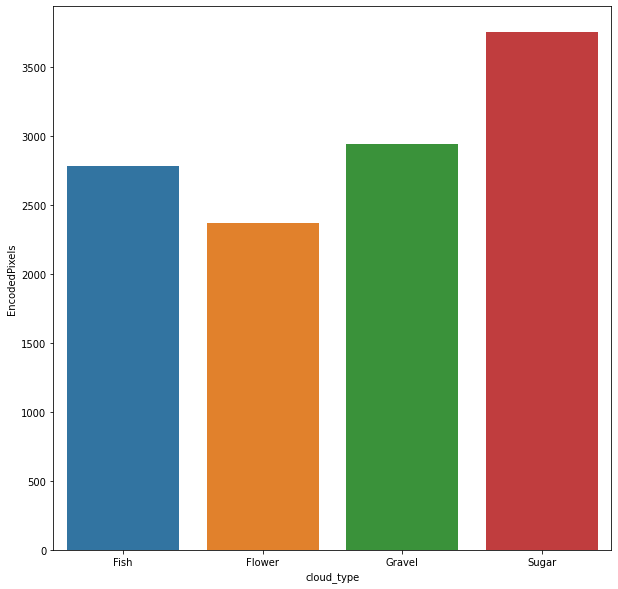

In [ ]:
plt.figure(figsize = (10,10))
c_types_plot = sns.barplot(x = 'cloud_type', y = 'EncodedPixels', data = c_types)
fig = c_types_plot.get_figure()
c_types_plot.figure.savefig("cloud types repartition.png")

## Conversion des masks

In [ ]:
def computeMaskPixels(en_pix):
    if isinstance(en_pix, str):
        rle = list(map(int, en_pix.split(' ')))
        pixel,pixel_count = [],[]

        [pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]
        rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
        rle_mask_pixels = sum(rle_pixels,[])
        return rle_mask_pixels, pixel, pixel_count
    else:
        return float('nan'), float('nan'), float('nan')

In [ ]:
def rle_decode(mask_rle: str = '', shape: tuple = (1400, 2100)):
    '''
    Decode rle encoded mask.
    
    :param mask_rle: run-length as string formatted (start length)
    :param shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')

In [ ]:
def findMaskCenter(mask):
  thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)[1]
  M = cv2.moments(thresh, True)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  cv2.circle(thresh, (cX, cY), 20, (0.5,0.5,0.5), -1)
  return [cX, cY]

In [ ]:
def computeArea(mask):
  thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)[1]
  M = cv2.moments(thresh, True)
  return M['m00']


# Crash tests

In [ ]:
center = findMaskCenter(mask)
area = computeArea(mask)

print("Center : ", center)
print("Area : ", area, 'px')

Center :  [685, 785]
Area :  932312.0 px


In [ ]:
contours = cnts[0][0]


In [ ]:
A = contours[0][0]
B = contours[1][0]
C = contours[2][0]
D = contours[3][0]

In [ ]:
print(A, B, C, D)
print("Area :", (B[1]-A[1])*(C[0]-B[0]), 'px')

[189 317] [ 189 1253] [1183 1253] [1183  317]
Area : 930384 px


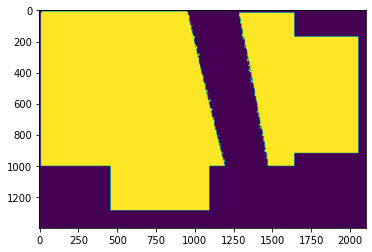

In [ ]:
mat = df_fish_not_null_converted.iloc[10]
blurred = cv2.GaussianBlur(mat, (5, 5), 0)
plt.imshow(blurred)

In [ ]:
center = findMaskCenter(mat)
area = computeArea(mat)

In [ ]:
thresh = cv2.threshold(mat, 0, 255, cv2.THRESH_BINARY)[1]
M = cv2.moments(thresh, True)

In [ ]:
M

{'m00': 701799.0,
 'm01': 333340788.0,
 'm02': 174786222592.0,
 'm03': 98696589460398.0,
 'm10': 488447523.0,
 'm11': 231339075401.0,
 'm12': 121105637061741.0,
 'm20': 445239132369.0,
 'm21': 210576154123627.0,
 'm30': 458525895965619.0,
 'mu02': 16455873098.112244,
 'mu03': 44119761999.8125,
 'mu11': -663937161.668396,
 'mu12': 86281368325.94922,
 'mu20': 105282844707.09747,
 'mu21': 20473211813.78125,
 'mu30': 2090020777056.5,
 'nu02': 0.03341145890781226,
 'nu03': 0.00010693042633851414,
 'nu11': -0.001348035990688205,
 'nu12': 0.00020911498797757181,
 'nu20': 0.21376279572989043,
 'nu21': 4.961969803408362e-05,
 'nu30': 0.005065458257638696}

In [ ]:
print("Center : ", center)
print("Area : ", area, 'px')

Center :  [695, 474]
Area :  701799.0 px


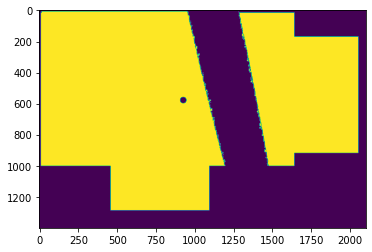

In [ ]:
thresh = cv2.threshold(mat, 0, 255, cv2.THRESH_BINARY)[1]
M = cv2.moments(thresh, True)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
cv2.circle(thresh, (cX, cY), 20, (0.5,0.5,0.5), -1)

plt.imshow(thresh)

In [ ]:
print(len(cn1))
print(cn2.shape)


39
(1, 39, 4)


In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
M2 = cv2.moments(cnts[0], True)

TypeError: ignored

In [ ]:
M = cv2.moments(thresh, True)


In [ ]:
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

In [ ]:
print(cX, cY)

685 785


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
hm_fish_loc.shape

(1400, 2100)

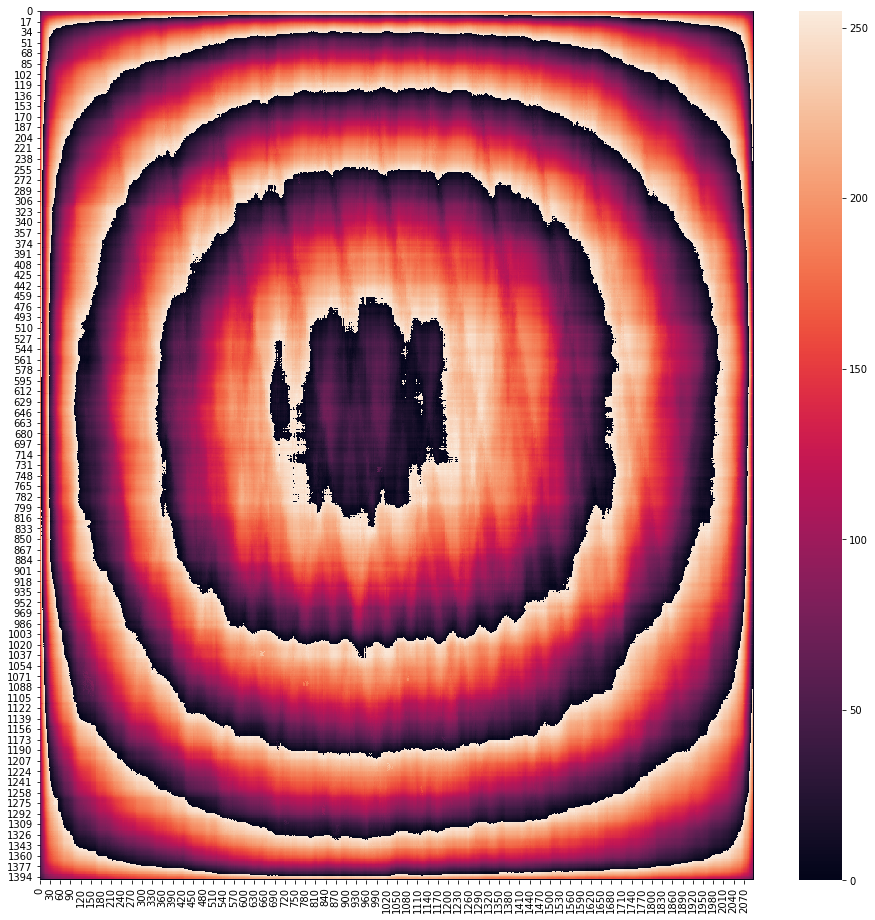

In [ ]:
fig = plt.figure(figsize=(16,16))
sns.heatmap(hm_fish_loc)

# Tentatives d'EDA + Dataviz

In [ ]:
import seaborn as sns

### Fish

In [ ]:
## Attention ! Chaque section remplit la RAM donc vous ne pouvez en exécuter qu'une seule avant le redémarrage de l'environnement !

In [ ]:
df_fish_not_null = df_train[(df_train['cloud_type']=='Fish') & (~df_train['EncodedPixels'].isna())]
df_fish_not_null['EncodedPixels'] =df_fish_not_null['EncodedPixels'].apply(rle_decode)
df_fish_not_null['Area'] = df_fish_not_null['EncodedPixels'].apply(computeArea)
df_fish_not_null['Area'].mean() #866464px

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


866464.659475009

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


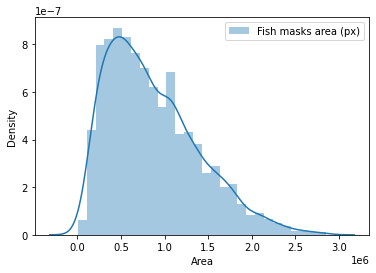

In [ ]:
sns.distplot(df_fish_not_null['Area'], label= 'Fish masks area (px)')
plt.legend()
img_dist_path = '/content/drive/My Drive/PROJET DS/Exploratory Data Analysis'
path_img = os.path.join('r', img_dist_path, 'fish_dist.png')

plt.savefig(path_img)

### Flower

In [ ]:
df_flower_not_null = df_train[(df_train['cloud_type']=='Flower') & (~df_train['EncodedPixels'].isna())]
df_flower_not_null['EncodedPixels'] =df_flower_not_null['EncodedPixels'].apply(rle_decode)
df_flower_not_null['Area'] =df_flower_not_null['EncodedPixels'].apply(computeArea)
df_flower_not_null['Area'].mean() #954321px

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


954321.0820295983

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


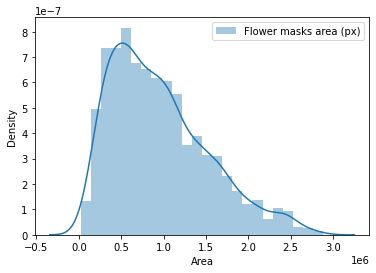

In [ ]:
sns.distplot(df_flower_not_null['Area'], label= 'Flower masks area (px)')
plt.legend()
img_dist_path = '/content/drive/My Drive/PROJET DS/Exploratory Data Analysis'
path_img = os.path.join('r', img_dist_path, 'flower_dist.png')

plt.savefig(path_img)

### Sugar

In [ ]:
df_sugar_not_null = df_train[(df_train['cloud_type']=='Sugar') & (~df_train['EncodedPixels'].isna())]
df_sugar_not_null['EncodedPixels'] =df_sugar_not_null['EncodedPixels'].apply(rle_decode)
df_sugar_not_null['Area'] =df_sugar_not_null['EncodedPixels'].apply(computeArea) 
df_sugar_not_null['Area'].mean() #714939px

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


714939.6579578778

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


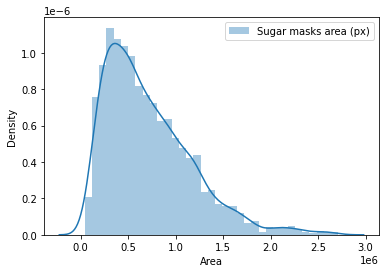

In [ ]:
sns.distplot(df_sugar_not_null['Area'], label= 'Sugar masks area (px)')
plt.legend()
img_dist_path = '/content/drive/My Drive/PROJET DS/Exploratory Data Analysis'
path_img = os.path.join('r', img_dist_path, 'sugar_dist.png')

plt.savefig(path_img)

### Gravel

In [ ]:
df_gravel_not_null = df_train[(df_train['cloud_type']=='Gravel') & (~df_train['EncodedPixels'].isna())]
df_gravel_not_null['EncodedPixels'] =df_gravel_not_null['EncodedPixels'].apply(rle_decode)
df_gravel_not_null['Area'] =df_gravel_not_null['EncodedPixels'].apply(computeArea)
df_gravel_not_null['Area'].mean() #838390

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


838390.7189520245

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


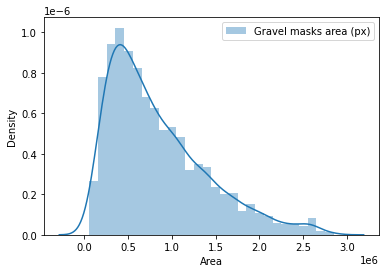

In [ ]:
sns.distplot(df_gravel_not_null['Area'], label= 'Gravel masks area (px)')
plt.legend()
img_dist_path = '/content/drive/My Drive/PROJET DS/Exploratory Data Analysis'
path_img = os.path.join('r', img_dist_path, 'gravel_dist.png')

plt.savefig(path_img)